In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud as wc
import imageio
import numpy as np
from datetime import datetime
import seaborn as sns
sns.set()

In [2]:
# load full dataframe
df = pd.read_csv('nyt_twt_red_data.csv').drop(columns='Unnamed: 0')
df = df.drop(columns='index')
df_copy = df.copy()
df.head()

,date,Open,Close,Adj Close,Company,Industry,Stock ticker,daily return,nyt_pol,nyt_sub,twt_pol,twt_sub,reddit_pol,reddit_sub
0,2019-01-02,153.529999,157.199997,151.025879,Linde plc,Basic Materials,LIN,0.023904,0.065703,0.304392,0.012880,0.130118,0.0,0.0
1,2019-01-03,154.059998,152.289993,146.308685,Linde plc,Basic Materials,LIN,-0.011489,0.079167,0.402891,0.040819,0.216521,0.0,0.0
2,2019-01-04,153.830002,156.630005,150.478256,Linde plc,Basic Materials,LIN,0.018202,0.149583,0.238437,0.074132,0.213505,0.0,0.0
3,2019-01-07,155.779999,156.490005,150.343765,Linde plc,Basic Materials,LIN,0.004558,0.212921,0.398316,-0.015952,0.233571,0.0,0.0
4,2019-01-08,156.089996,158.149994,151.938553,Linde plc,Basic Materials,LIN,0.013198,0.022998,0.143681,0.024318,0.192727,0.0,0.0


In [3]:
def get_datetime(date_str):
    ''' convert date string into datetime
    Args:
        date_str (str): date string before conversion
        
    Returns:
        dt (datetime): datetime.date() of the string date 
    '''
    dt = datetime.strptime(date_str[:10], '%Y-%m-%d').date()
    
    return dt

In [4]:
# convert date into datetime
df['date'] = df['date'].map(get_datetime)
df.head()

,date,Open,Close,Adj Close,Company,Industry,Stock ticker,daily return,nyt_pol,nyt_sub,twt_pol,twt_sub,reddit_pol,reddit_sub
0,2019-01-02,153.529999,157.199997,151.025879,Linde plc,Basic Materials,LIN,0.023904,0.065703,0.304392,0.012880,0.130118,0.0,0.0
1,2019-01-03,154.059998,152.289993,146.308685,Linde plc,Basic Materials,LIN,-0.011489,0.079167,0.402891,0.040819,0.216521,0.0,0.0
2,2019-01-04,153.830002,156.630005,150.478256,Linde plc,Basic Materials,LIN,0.018202,0.149583,0.238437,0.074132,0.213505,0.0,0.0
3,2019-01-07,155.779999,156.490005,150.343765,Linde plc,Basic Materials,LIN,0.004558,0.212921,0.398316,-0.015952,0.233571,0.0,0.0
4,2019-01-08,156.089996,158.149994,151.938553,Linde plc,Basic Materials,LIN,0.013198,0.022998,0.143681,0.024318,0.192727,0.0,0.0


## Analyze Individual Features

### Daily Return

In [5]:
# Adding a month column
fdf = df_copy
fdf['month'] = fdf['date'].apply(lambda s: s[5:7])
fdf

,date,Open,Close,Adj Close,Company,Industry,Stock ticker,daily return,nyt_pol,nyt_sub,twt_pol,twt_sub,reddit_pol,reddit_sub,month
0,2019-01-02,153.529999,157.199997,151.025879,Linde plc,Basic Materials,LIN,0.023904,0.065703,0.304392,0.012880,0.130118,0.0,0.0,01
1,2019-01-03,154.059998,152.289993,146.308685,Linde plc,Basic Materials,LIN,-0.011489,0.079167,0.402891,0.040819,0.216521,0.0,0.0,01
2,2019-01-04,153.830002,156.630005,150.478256,Linde plc,Basic Materials,LIN,0.018202,0.149583,0.238437,0.074132,0.213505,0.0,0.0,01
3,2019-01-07,155.779999,156.490005,150.343765,Linde plc,Basic Materials,LIN,0.004558,0.212921,0.398316,-0.015952,0.233571,0.0,0.0,01
4,2019-01-08,156.089996,158.149994,151.938553,Linde plc,Basic Materials,LIN,0.013198,0.022998,0.143681,0.024318,0.192727,0.0,0.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,2019-12-23,20.950001,21.200001,19.417809,Kinder Morgan,Energy,KMI,0.011933,0.144016,0.354293,0.092145,0.264810,0.0,0.0,12
9785,2019-12-24,21.180000,21.129999,19.353691,Kinder Morgan,Energy,KMI,-0.002361,0.141380,0.359756,0.105683,0.364879,0.0,0.0,12
9786,2019-12-26,21.190001,21.200001,19.417809,Kinder Morgan,Energy,KMI,0.000472,0.125000,0.329167,0.137622,0.402566,0.0,0.0,12
9787,2019-12-27,21.260000,21.080000,19.307896,Kinder Morgan,Energy,KMI,-0.008467,0.075000,0.410417,0.107538,0.318737,0.0,0.0,12


<AxesSubplot:xlabel='month', ylabel='daily return'>

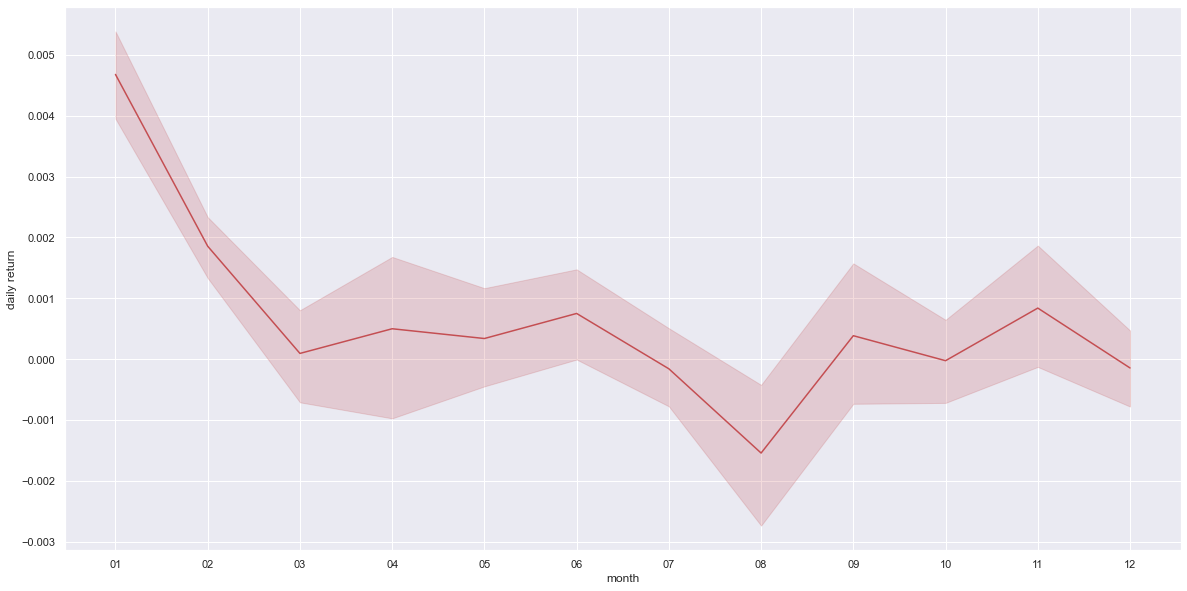

In [6]:
# x=month, y=return

# Finding avg returns for each month
fdf1 = fdf.groupby(['month']).mean()
fdf1.reset_index()

# Making a line chart
fig, axes = plt.subplots(figsize=(20, 10))
sns.lineplot(ax=axes, data=fdf1, x='month', y='daily return', color='r')

### Polarity Scores

In [7]:
def flatten_df(df):
    ''' Flatten the full dataframe so each row only contains one sentiment score
    Args:
        df (pd.DataFrame): dataframe containing all scores and stock return data in one row
        
    Returns:
        df_flat (pd.DataFrame): dataframe cotaining one score for one source in one row
    '''
    df_flat = pd.DataFrame()

    for idx, row in df.iterrows():
        row_new = {'date': row['date'],
                   'company': row['Company'],
                   'industry': row['Industry'],
                   'ticker': row['Stock ticker'],
                   'daily return': row['daily return']
                  }

        # NYT
        row_new['platform'] = 'NYT'
        row_new['pol'] = row['nyt_pol']
        row_new['sub'] = row['nyt_sub']
        df_flat = df_flat.append(row_new, ignore_index=True)

        # Twitter
        row_new['platform'] = 'Twitter'
        row_new['pol'] = row['twt_pol']
        row_new['sub'] = row['twt_sub']
        df_flat = df_flat.append(row_new, ignore_index=True)

        # Reddit
        row_new['platform'] = 'Reddit'
        row_new['pol'] = row['reddit_pol']
        row_new['sub'] = row['reddit_sub']
        df_flat = df_flat.append(row_new, ignore_index=True)
        
    return df_flat

In [8]:
df_flat = flatten_df(df)
df_flat.head()

,company,daily return,date,industry,platform,pol,sub,ticker
0,Linde plc,0.023904,2019-01-02,Basic Materials,NYT,0.065703,0.304392,LIN
1,Linde plc,0.023904,2019-01-02,Basic Materials,Twitter,0.012880,0.130118,LIN
2,Linde plc,0.023904,2019-01-02,Basic Materials,Reddit,0.000000,0.000000,LIN
3,Linde plc,-0.011489,2019-01-03,Basic Materials,NYT,0.079167,0.402891,LIN
4,Linde plc,-0.011489,2019-01-03,Basic Materials,Twitter,0.040819,0.216521,LIN


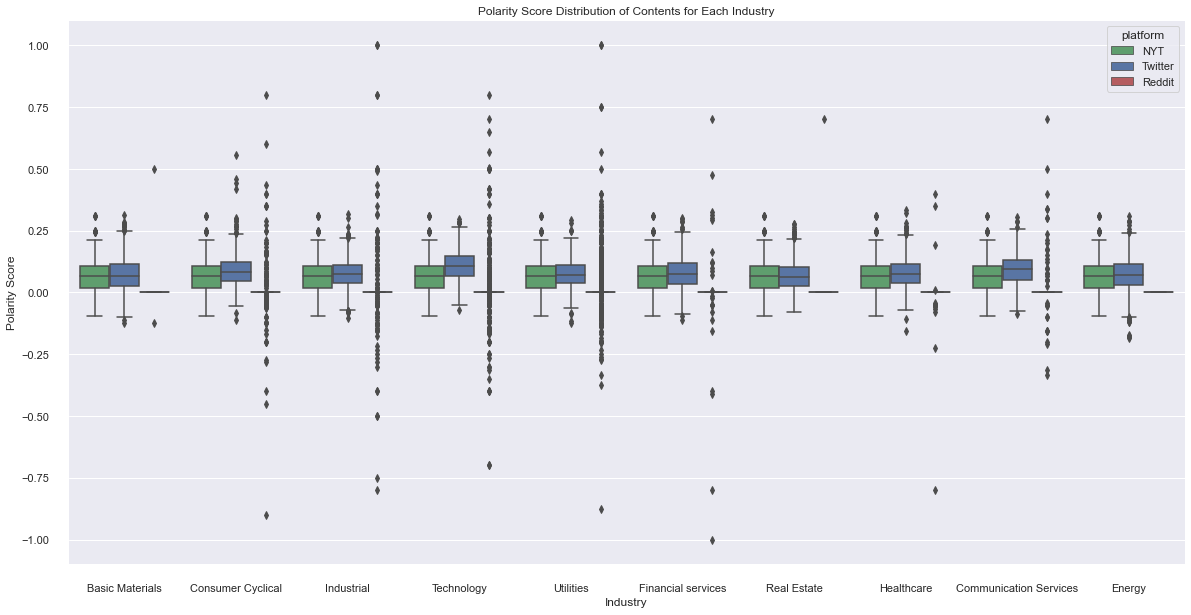

In [9]:
# Create boxplot of Polarity Score distribution for each industry and platform
plt.figure(figsize=(20,10))
palette = {'NYT': 'g', 'Twitter':'b', 'Reddit':'r'}
sns.boxplot(x='industry', y='pol',
            hue='platform', 
            data=df_flat,
            palette=palette)

# add label
plt.title('Polarity Score Distribution of Contents for Each Industry')
plt.ylabel('Polarity Score')
plt.xlabel('Industry')

sns.despine(offset=10)

## Relationship Between Two Features

### Simple Scatter

Text(0.5, 1.0, 'Daily Stock Return vs. Polarity Score Across Media Platforms')

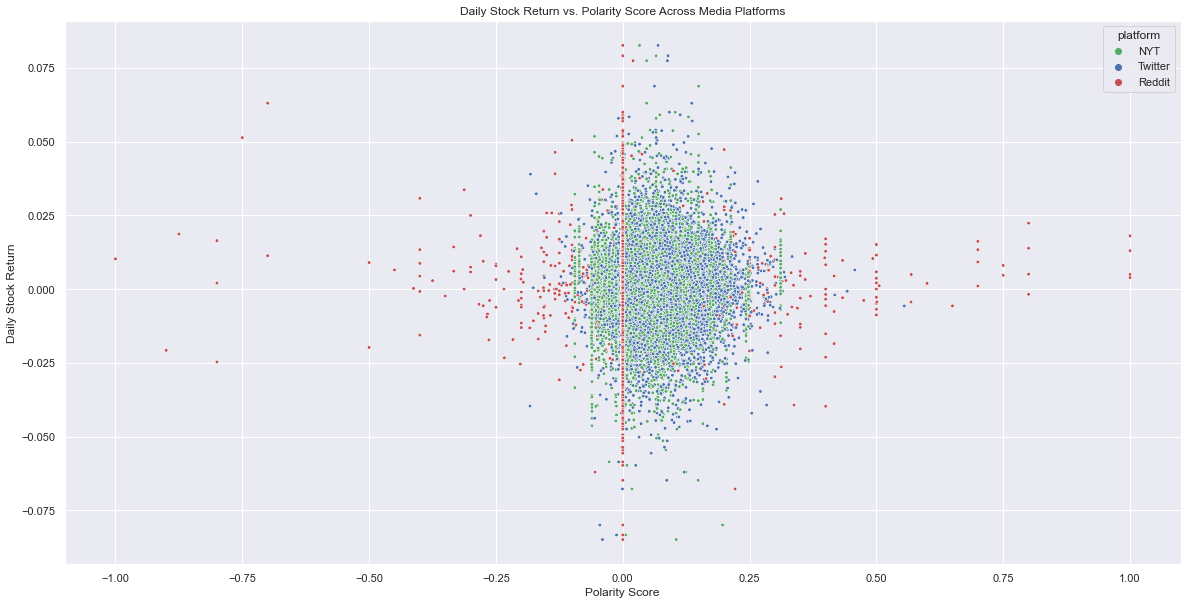

In [10]:
# Plot stock return vs polarity for every platform to see the overall relationship
plt.figure(figsize=(20,10))
palette = {'NYT': 'g', 'Twitter':'b', 'Reddit':'r'}
sns.scatterplot(x=df_flat['pol'], y=df_flat['daily return'], hue=df_flat['platform'], 
                palette=palette, marker='.', s=50,alpha=1)

# add label
plt.ylabel('Daily Stock Return')
plt.xlabel('Polarity Score')
plt.title('Daily Stock Return vs. Polarity Score Across Media Platforms')

### Time Series of daily return and polarity score movement

In [11]:
# group the original dataframe by date to find mean scores
date_grouped = df.groupby('date').mean().reset_index()
date_grouped = date_grouped.dropna()
date_grouped.head()

,date,Open,Close,Adj Close,daily return,nyt_pol,nyt_sub,twt_pol,twt_sub,reddit_pol,reddit_sub
0,2019-01-02,118.684091,121.621673,117.289665,0.017943,0.065703,0.304392,0.093161,0.295440,0.006626,0.037267
1,2019-01-03,120.591843,118.751532,114.513463,-0.012707,0.079167,0.402891,0.070659,0.243547,0.011536,0.022088
2,2019-01-04,120.605499,123.459004,119.095606,0.020033,0.149583,0.238437,0.058937,0.256548,0.004266,0.042454
3,2019-01-07,124.278340,125.407301,121.025050,0.007949,0.212921,0.398316,0.077887,0.274445,-0.005513,0.035550
4,2019-01-08,126.990436,126.908321,122.482155,0.000379,0.022998,0.143681,0.081481,0.286937,-0.002591,0.017147


In [12]:
def weekday(date):
    ''' function that returns the day of the week
    Args:
        date (datetime): given date in datetime
    
    Returns:
        date.weekday(): the day of the week indicated by 0 to 6
    '''
    return date.weekday()

In [13]:
# find weekday
date_grouped['week'] = date_grouped['date'].apply(weekday)

# find each recurring weekday and assign week number up to 52
week_list = []

n=0
for weekday in date_grouped['week']:  
    if weekday != 2:
        week_list.append(n)
    elif weekday == 2:
        week_list.append(n+1)
        n += 1    

# manually add the last week missing 2 (wednesday)
week_list[-1] = 52
week_list[-2] = 52
week_list[-3] = 52
week_list[-4] = 52

# apply the week numbers
date_grouped['week'] = week_list
date_grouped

,date,Open,Close,Adj Close,daily return,nyt_pol,nyt_sub,twt_pol,twt_sub,reddit_pol,reddit_sub,week
0,2019-01-02,118.684091,121.621673,117.289665,0.017943,0.065703,0.304392,0.093161,0.295440,0.006626,0.037267,1
1,2019-01-03,120.591843,118.751532,114.513463,-0.012707,0.079167,0.402891,0.070659,0.243547,0.011536,0.022088,1
2,2019-01-04,120.605499,123.459004,119.095606,0.020033,0.149583,0.238437,0.058937,0.256548,0.004266,0.042454,1
3,2019-01-07,124.278340,125.407301,121.025050,0.007949,0.212921,0.398316,0.077887,0.274445,-0.005513,0.035550,1
4,2019-01-08,126.990436,126.908321,122.482155,0.000379,0.022998,0.143681,0.081481,0.286937,-0.002591,0.017147,1
...,...,...,...,...,...,...,...,...,...,...,...,...
246,2019-12-23,154.278630,154.285276,151.184191,-0.000015,0.144016,0.354293,0.091946,0.291919,0.004615,0.008205,51
247,2019-12-24,154.350396,154.022683,150.924714,-0.000493,0.141380,0.359756,0.079873,0.273942,-0.002344,0.018840,52
248,2019-12-26,154.453791,156.365788,153.284969,0.002465,0.125000,0.329167,0.093925,0.313969,0.007265,0.024786,52
249,2019-12-27,157.006840,156.301396,153.220079,-0.004606,0.075000,0.410417,0.087298,0.306864,-0.002137,0.004794,52


In [14]:
# group by week for weekly averages
week_grouped = date_grouped.groupby('week').mean()
week_grouped = week_grouped.reset_index()
week_grouped.head()

,week,Open,Close,Adj Close,daily return,nyt_pol,nyt_sub,twt_pol,twt_sub,reddit_pol,reddit_sub
0,1,122.230042,123.229566,118.881188,0.006719,0.106074,0.297544,0.076425,0.271383,0.002865,0.030901
1,2,126.631235,127.420118,122.986267,0.005973,0.054629,0.363562,0.080172,0.275890,0.003392,0.035073
2,3,129.367787,129.219665,124.737766,0.002345,0.042765,0.384629,0.074492,0.286424,0.001149,0.042759
3,4,128.816255,128.730005,124.220951,0.001746,0.041156,0.293389,0.073236,0.282883,0.000970,0.040359
4,5,130.727976,131.969389,127.366858,0.006677,0.081480,0.347361,0.075257,0.288140,-0.000832,0.047139


In [15]:
def dual_axis_plot(week_grouped, platform):
    ''' Create a line plot with dual axis of stock return and pol score
    Args:
        week_grouped (pd.DataFrame): dataframe with weekly average scores
        platform (str): name of the platform to plot "twitter", "nyt", "reddit"
    
    Returns:
        dual axis plot with stock return and score of a given platform
    '''
    # plot and label daily return
    plt.figure(figsize=(20,10))
    plt.plot(week_grouped['week'], week_grouped['daily return'], color='k', label='Daily Return')
    plt.xlabel('Week')
    plt.ylabel('Daily Stock Return')
    plt.title('Stock Return and Polarity Score over Time')
    plt.legend(loc='upper left')

    # plot the accoring platform scores
    ax2 = plt.gca().twinx()
    
    if platform == 'twitter':
        plt.plot(week_grouped['week'], week_grouped['twt_pol'], color='b', label='Twitter')
    elif platform == 'nyt':
        plt.plot(week_grouped['week'], week_grouped['nyt_pol'], color='g', label='NYT')
    elif platform == 'reddit':
        plt.plot(week_grouped['week'], week_grouped['reddit_pol'], color='r', label='Reddit')
    
    plt.ylabel('Polarity Score')
    plt.legend(loc='upper right')
    plt.grid(b=None)
    plt.show()

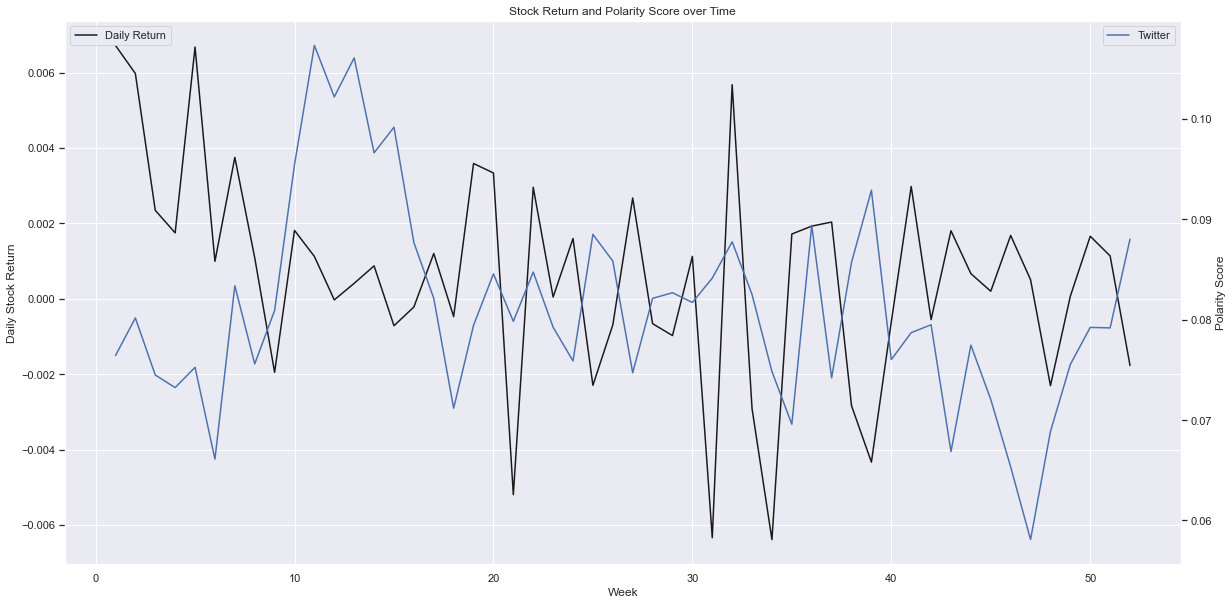

In [16]:
# Twitter dual axis plot
dual_axis_plot(week_grouped, 'twitter')

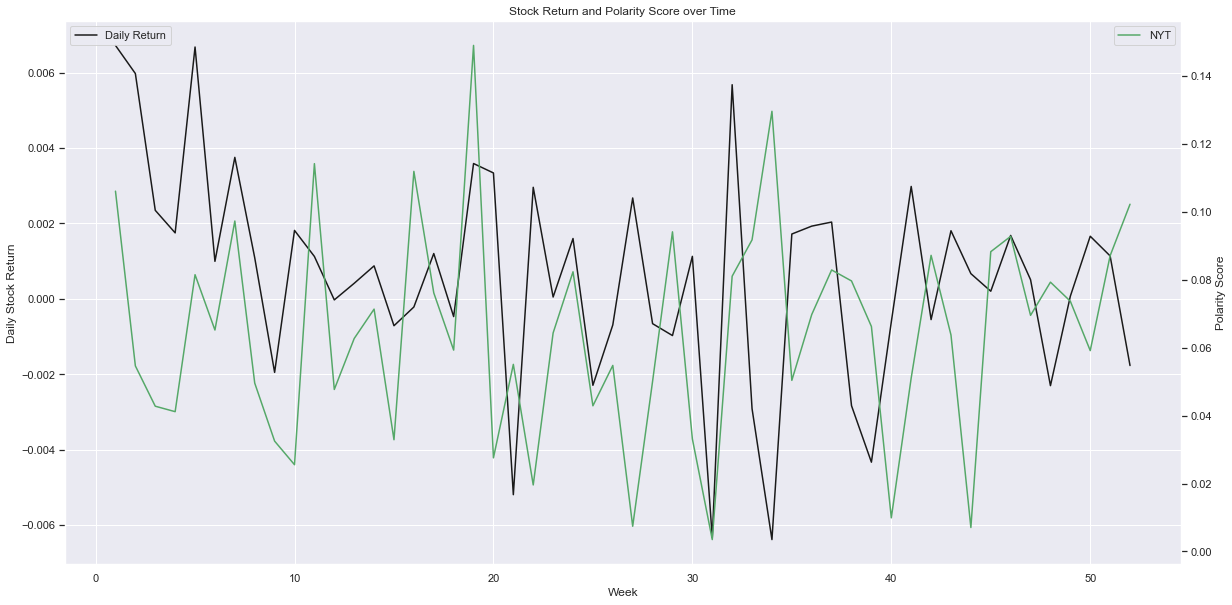

In [17]:
# NYT dual axis plot
dual_axis_plot(week_grouped, 'nyt')

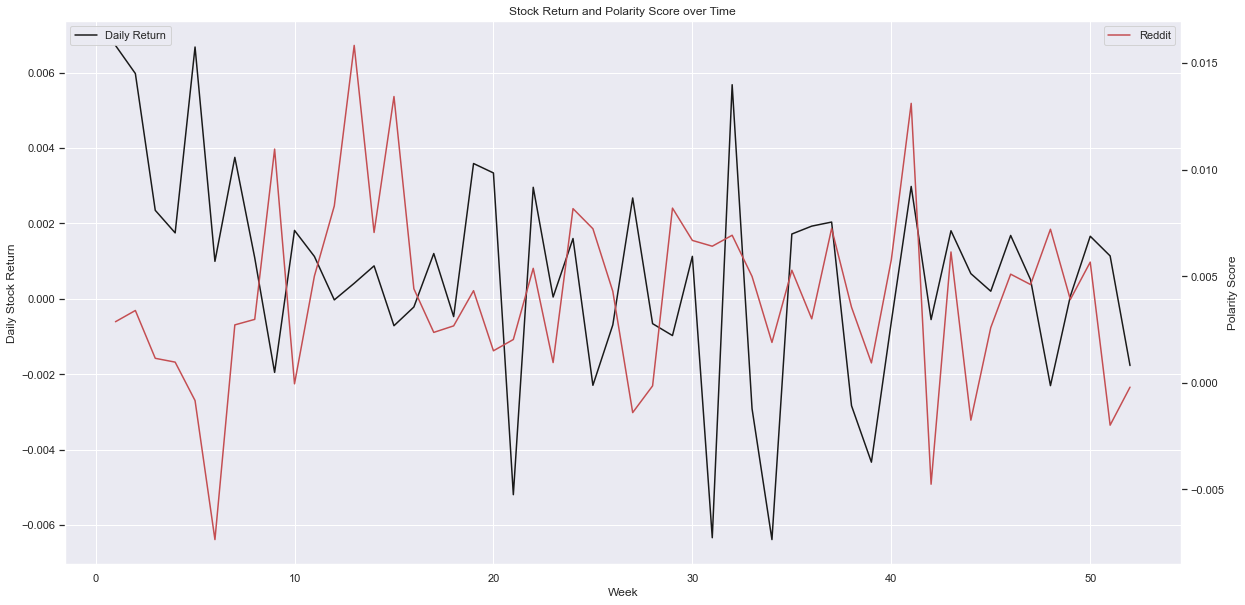

In [18]:
# Reddit dual axis plot
dual_axis_plot(week_grouped, 'reddit')

### Word cloud of NYT data

In [19]:
# Load NYT data with all headlines and abstract
news = pd.read_csv('news.csv', index_col=[0])

# convert date to datetime for sorting
news['date'] = news['date'].map(get_datetime)
news['date'] = news['date'].map(lambda x: str(x))

# selet 2019 data and assign months
news = news[news['date'].str.slice(0,4)=='2019']
news['month'] = news['date'].apply(lambda s: str(s)[5:7])

# only select headlines
news = news.drop(['date', 'abstract'], axis=1)
news['headline'] = news['headline'].map(lambda x: str(x))

news

,headline,month
19587,"In the Race for Content, Hollywood Is Buying U...",01
19588,Who’s Really Getting Ripped Off by $35 Sage?,01
19589,Will 2019 Be a Good Year for Investors? Here A...,01
19590,"Log Cabins? No, These Wooden Buildings Are Hig...",01
19591,Netflix Blocks Show in Saudi Arabia Critical o...,01
...,...,...
22741,"Carlos Ghosn, Fugitive but a Favorite Son, Ret...",12
22742,"Carlos Ghosn’s Escape: A Lawyer in Beirut, a F...",12
22743,Recent Commercial Real Estate Transactions,12
22744,"The Warriors Get a New Home, and New Neighbors",12


In [20]:
# concatenate all headlines for each month
news1 = news
news1 = news1.groupby(['month'])['headline'].apply(','.join).reset_index()
news1

,month,headline
0,01,"In the Race for Content, Hollywood Is Buying U..."
1,02,McKinsey Advised Purdue Pharma How to ‘Turboch...
2,03,Gap Plans to Spin Off Old Navy After a Dismal ...
3,04,DealBook Briefing: Aramco Makes More Money Tha...
4,05,"Employers Who Talk Up Gender Equity, but Silen..."
5,06,"Trump to Give Arthur Laffer, Tax-Cut Champion,..."
6,07,"S&P and Dow Follow Global Markets Higher, as I..."
7,08,Skip Cash for Equifax Breach and Get Credit Mo...
8,09,How Much Will the Trade War Cost You by the En...
9,10,"Me and My Whistle-Blower,Global Trade Is Deter..."


In [21]:
# getting avg returns for each month
monthavg = fdf.groupby(['month']).mean()

# if return was positive that month then 1 else 0
a = monthavg['daily return'].apply(lambda x: 1 if x>0 else 0)
news1 = news1.merge(a, on='month')

# adding color based on return. Green for positive. Red for negative.
news1['color'] = news1['daily return'].apply(lambda x: 'green' if x==1 else 'red')
news1

,month,headline,daily return,color
0,01,"In the Race for Content, Hollywood Is Buying U...",1,green
1,02,McKinsey Advised Purdue Pharma How to ‘Turboch...,1,green
2,03,Gap Plans to Spin Off Old Navy After a Dismal ...,1,green
3,04,DealBook Briefing: Aramco Makes More Money Tha...,1,green
4,05,"Employers Who Talk Up Gender Equity, but Silen...",1,green
5,06,"Trump to Give Arthur Laffer, Tax-Cut Champion,...",1,green
6,07,"S&P and Dow Follow Global Markets Higher, as I...",0,red
7,08,Skip Cash for Equifax Breach and Get Credit Mo...,0,red
8,09,How Much Will the Trade War Cost You by the En...,1,green
9,10,"Me and My Whistle-Blower,Global Trade Is Deter...",0,red


<ipython-input-22-b007b8f75889>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


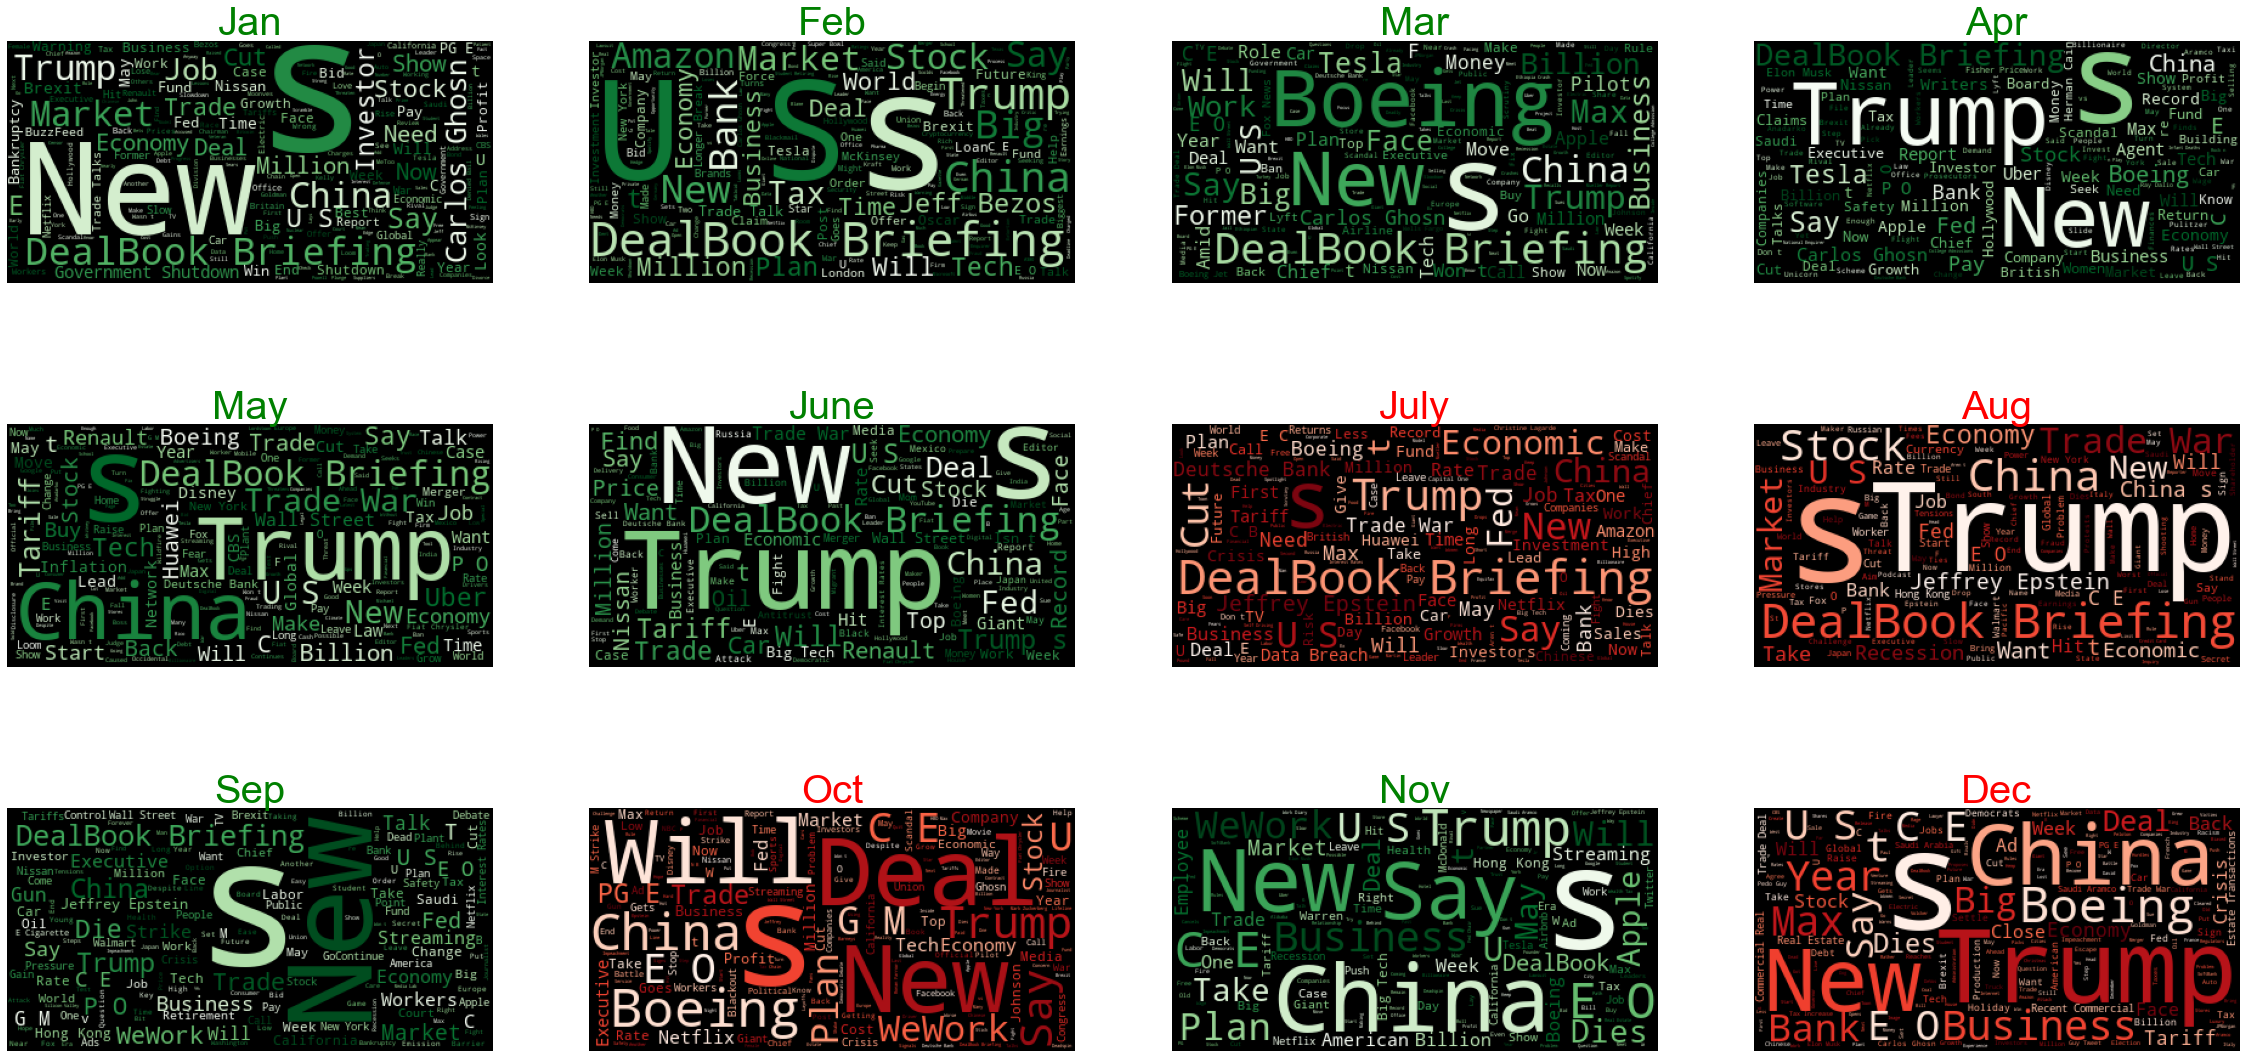

In [22]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def gen_wc(df):
    ''' Generate word clouds for each month and the overall stock return
        indicated as red or green color
    Args: 
        df (pd.DataFrame): dataframe containing sentiment scores and daily return for each stock
                            and media platform
    
    Returns: 
        wordsclouds for each month
    '''
    fig,ax = plt.subplots(3,4,figsize=(40, 20))
    c=0
    for i in range(3):
        for j in range(4):
            # assignning the word cloud a color based on that month's return 
            if df.loc[c, 'color'] == 'red':
                color = 'Reds'
            else:
                color= 'Greens'
            cloud = wc.WordCloud(colormap=color, background_color='black').generate(df.loc[c, 'headline'])
            ax[i, j].imshow(cloud)
            ax[i, j].set_title(months[c], size=40, color=df.loc[c, 'color'])
            ax[i, j].axis('off')
            c+=1
    fig.show()

gen_wc(news1)